In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lux

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
#Import necessary imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [44]:
df = pd.read_csv('triage.csv')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [45]:
df.shape

(752, 11)

In [46]:
#Checking for missing values in each column
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [47]:
#Impuing Null values
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [48]:
#Checking for missing values in each column again
df_imputed.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [49]:
df_imputed.dtypes

pat_id    object
age       object
gender    object
rr        object
sat       object
pulse     object
bps       object
bpd       object
gcs       object
tempt     object
class     object
dtype: object


In [50]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x)) 

In [51]:
df_imputed.dtypes

pat_id     object
age       float64
gender     object
rr        float64
sat       float64
pulse     float64
bps       float64
bpd       float64
gcs       float64
tempt     float64
class      object
dtype: object


In [52]:
# Finding Unique values in the columns

for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* pat_id ************************************************************

{'FE010010081', 'FE010010033', 'FE010010645', 'FE010010092', 'FE010010432', 'FE010010559', 'FE010010598', 'FE010010197', 'FE010010280', 'FE010010666', 'FE010010507', 'FE010010332', 'FE010010486', 'FE010010276', 'FE010010611', 'FE010010649', 'FE010010230', 'FE010010296', 'FE010010301', 'FE010010069', 'FE010010389', 'FE010010257', 'FE010010180', 'FE010010433', 'FE010010510', 'FE010010011', 'FE010010663', 'FE010010646', 'FE010010334', 'FE010010514', 'FE010010411', 'FE010010710', 'FE010010274', 'FE010010016', 'FE010010271', 'FE010010421', 'FE010010726', 'FE010010401', 'FE010010460', 'FE010010681', 'FE010010184', 'FE010010038', 'FE010010150', 'FE010010405', 'FE010010749', 'FE010010493', 'FE010010748', 'FE010010430', 'FE010010477', 'FE010010128', 'FE010010413', 'FE010010073', 'FE010010485', 'FE010010488', 'FE010010523', 'FE010010186', 'FE010010318', 'FE010010067', 'FE0100100

In [53]:
df_imputed = df_imputed.drop(columns=['pat_id'])
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_imputed['gender'] = le.fit_transform(df_imputed['gender'])
df_imputed['class'] = le.fit_transform(df_imputed['class'])
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Axes(0.125,0.11;0.775x0.77)


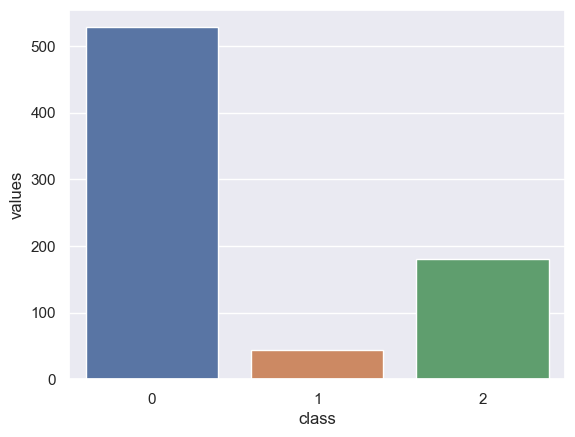

In [56]:
#Check Label Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df_imputed["class"].value_counts()
temp_df= pd.DataFrame({'class': temp.index,'values': temp.values})
print(sns.barplot(x = 'class', y="values", data=temp_df))

In [57]:
df_imputed.dtypes

age       float64
gender      int64
rr        float64
sat       float64
pulse     float64
bps       float64
bpd       float64
gcs       float64
tempt     float64
class       int64
dtype: object


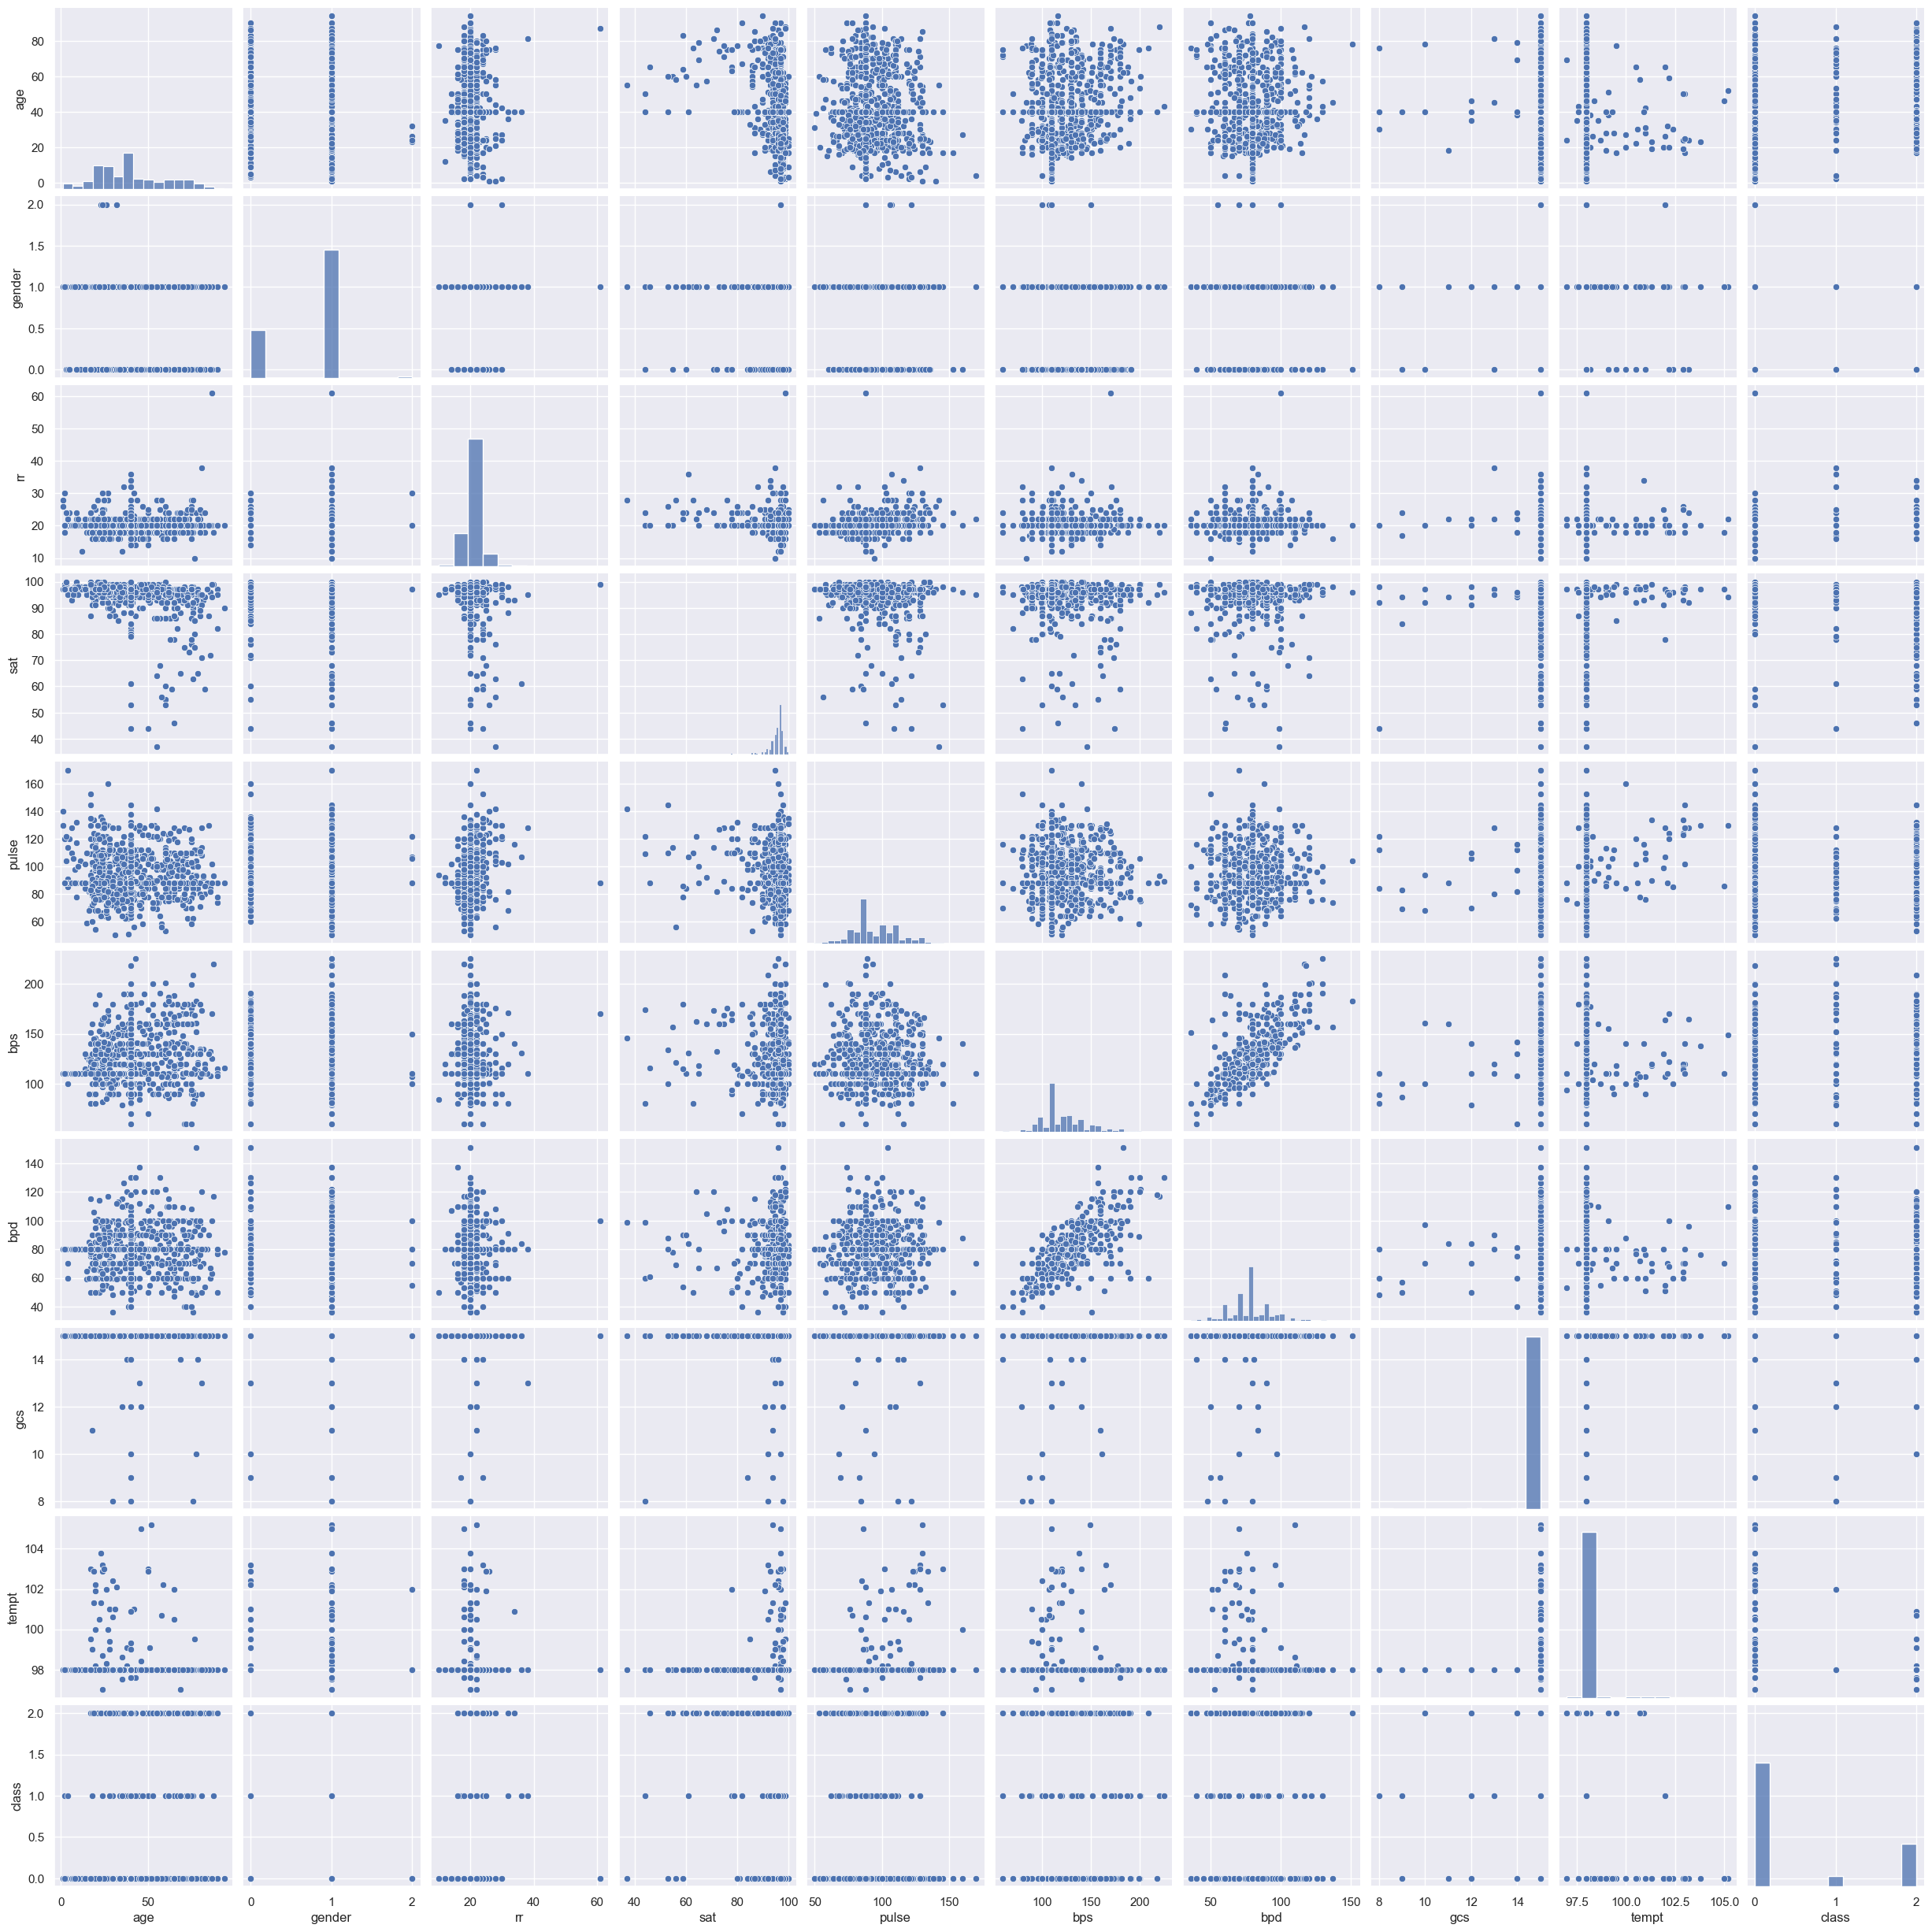

In [58]:
sns.pairplot(df_imputed)

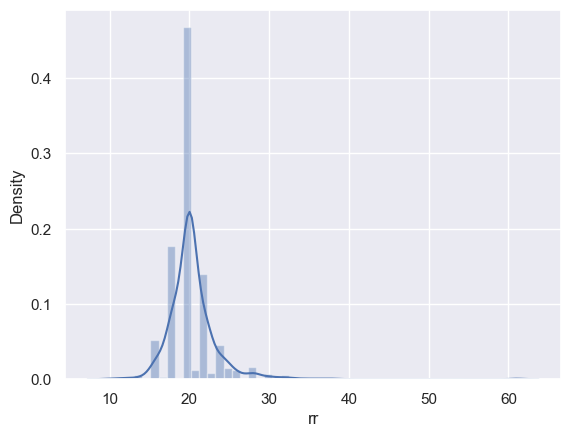

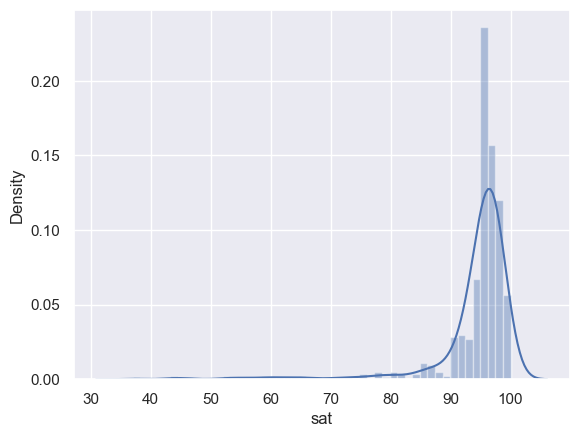

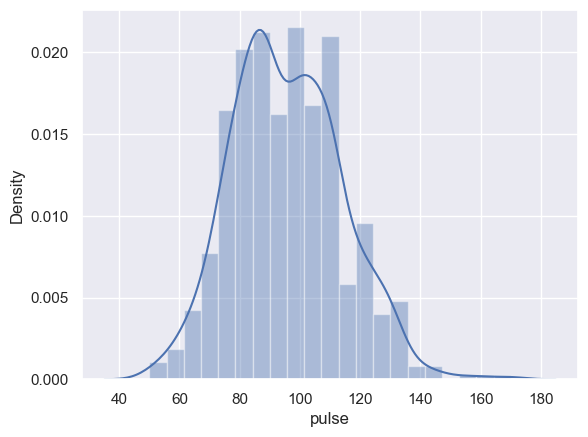

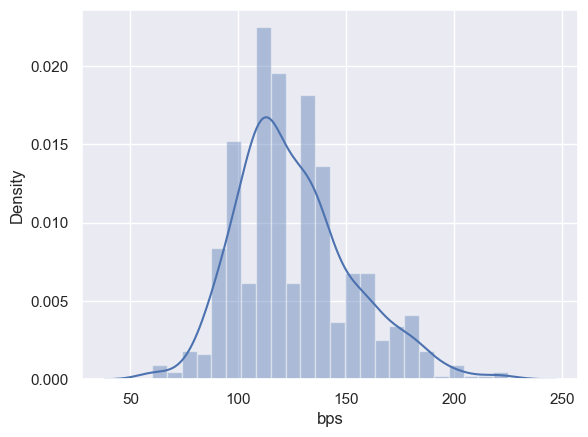

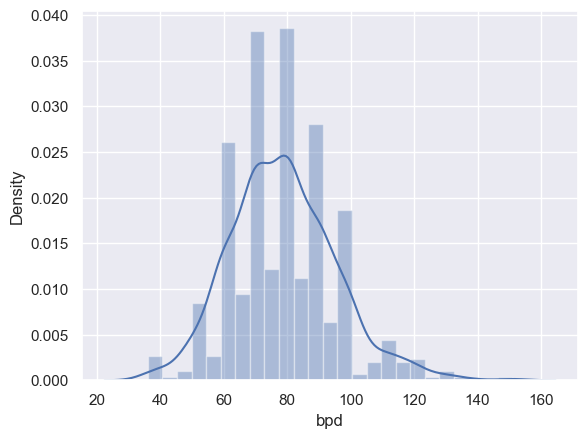

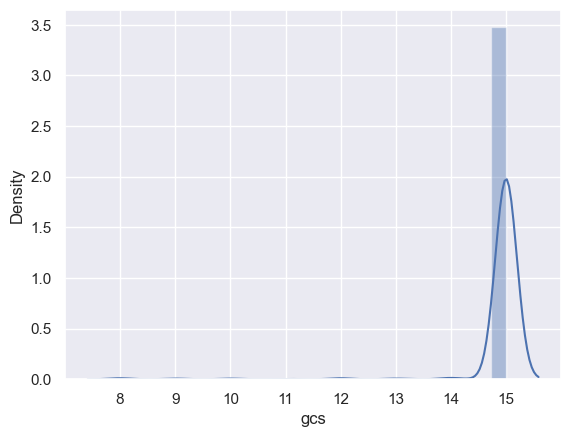

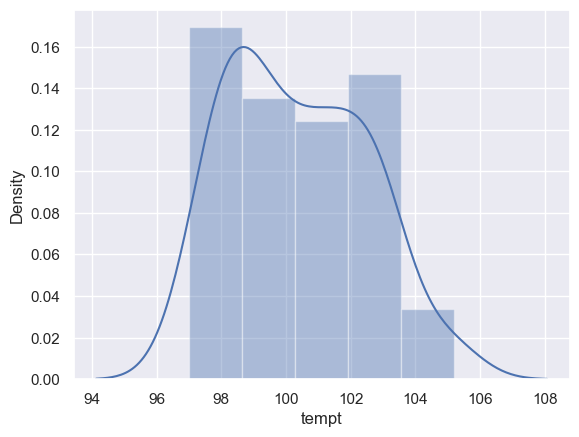

In [60]:
# Find the distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["int64"]).columns)[1:]:
    distplots(i)

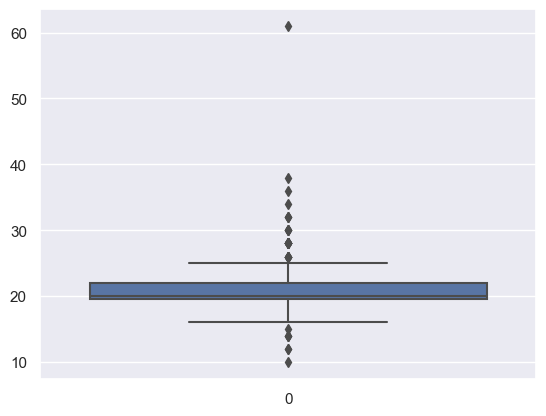

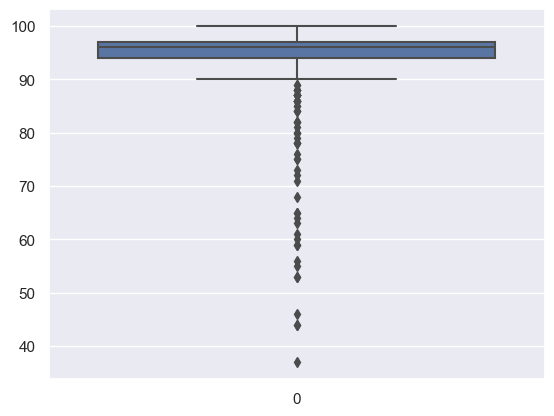

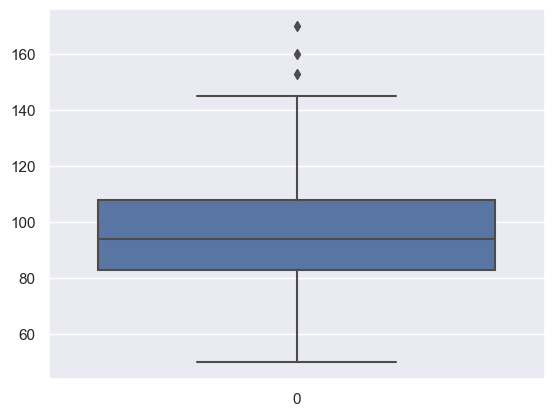

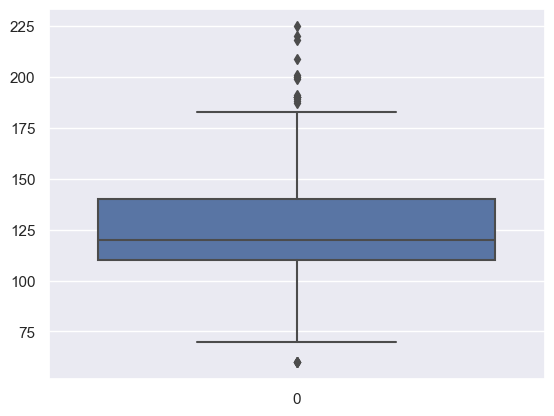

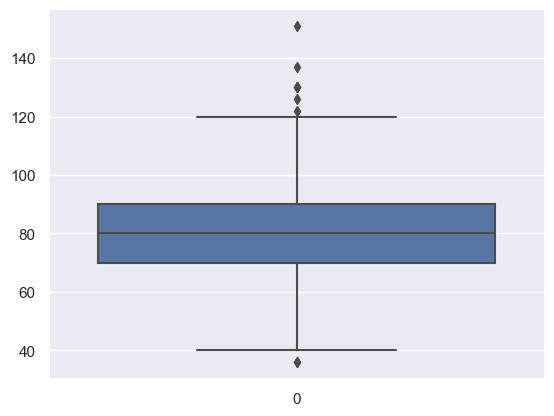

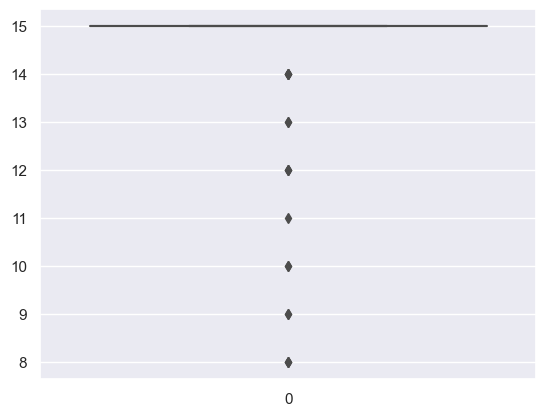

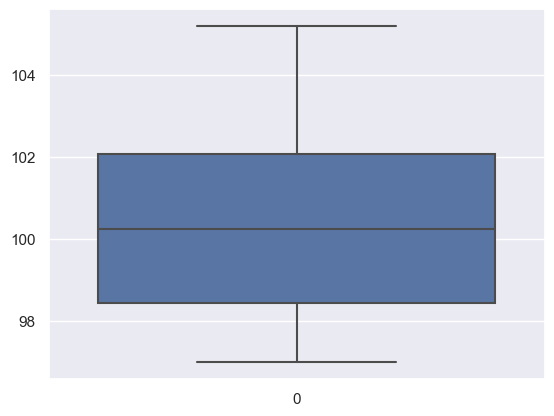

In [61]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["int64"]).columns)[1:]:
    boxplots(i)

In [62]:
df_imputed.to_csv("Triage_Pre_Processed.csv")